#Multiclass-Image-Classification using CIFAR-100
##Project 2 - Section 1
### List of Tasks

1. Download the CIFAR-100 dataset from the Keras library. You can download it using the following command tf.keras.datasets.cifar100.load_data(). Note that this is a dataset different from CIFAR-10. See more information here.

1. Split the data into training and testing sets.
1. Normalise the pixel values and one-hot encode the labels.
1. Compile, train and evaluate the model. Please note that the selection of hyperparameters as well as the size of the neural network is your own decision.

### Preparation

Import Libraries required for the project:

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Download CIFAR-100 dataset and split it into traing and testing sets



In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


Plot and look at some pictures

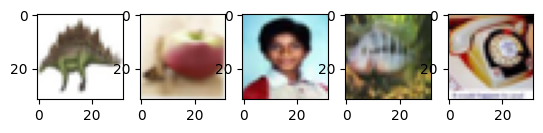

In [3]:
import matplotlib.pyplot as plt

plt.subplot(1, 5, 1)
plt.imshow(X_train[1])
plt.subplot(1, 5, 2)
plt.imshow(X_train[2])
plt.subplot(1, 5, 3)
plt.imshow(X_train[3])
plt.subplot(1, 5, 4)
plt.imshow(X_train[4])
plt.subplot(1, 5, 5)
plt.imshow(X_train[5])

Understand if the categories correspond to the fine labels or coarse labels

In [5]:
y_train[1]

array([29])

How can I get the 100 fine labels from the CIFAR-100 Dataset?

##Normalise pixel values and one-hot encode the labels

###Pre-Process Images

Divide each pixel value in the datasets by 255.0. Since pixel values typically range from 0 to 255 (in the case of 8-bit images), dividing by 255.0 scales the pixel values to the range between 0 and 1. This process effectively normalizes the pixel values to the interval [0, 1].


In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

### One-hot encode Labels

Convert the training labels (y_train) and test labels (y_test) into categorical format using the to_categorical() function from tf.keras.utils module, representing labels in a categorical format, where each label is represented as a one-hot encoded vector.

In [7]:
y_train = tf.keras.utils.to_categorical(y_train,)
y_test = tf.keras.utils.to_categorical(y_test)

##Define the model

Recognize the 100 classes in the CIFAR-100 Dataset (Fine Labels)

In [ ]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),input_shape = (32,32,3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (4, 4), padding = 'same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (4, 4), padding = 'same', activation='relu'))
#model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(100, activation='softmax'))   #100 classes for CIFAR-100

Print a summary of the model definition

In [73]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 128)       65664     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 8, 8, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 8, 8, 256)         524544    
                                                                 
 flatten_14 (Flatten)        (None, 16384)           

Compile the Convolutional Nural Network, including a a learning rate of 0.005

In [74]:
optimizer = tf.keras.optimizers.Adam(0.0004)
model.compile(loss='categorical_crossentropy',
               optimizer= optimizer,
               metrics='accuracy')

Implement an early stopping function to prevent the CNN from overfitting

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.002, patience=3)

Train the model over max 20 epochs

In [76]:
history = model.fit(X_train, y_train, epochs=20,shuffle = True, batch_size = 64, callbacks=[earlyStopping], validation_data=(X_test, y_test))

Epoch 1/20
782/782 [==============================] - 13s 14ms/step - loss: 3.9226 - accuracy: 0.1013 - val_loss: 3.3699 - val_accuracy: 0.1942
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 3.1314 - accuracy: 0.2334 - val_loss: 2.9422 - val_accuracy: 0.2704
Epoch 3/20
782/782 [==============================] - 10s 13ms/step - loss: 2.7267 - accuracy: 0.3118 - val_loss: 2.7296 - val_accuracy: 0.3149
Epoch 4/20
782/782 [==============================] - 11s 14ms/step - loss: 2.4145 - accuracy: 0.3784 - val_loss: 2.5062 - val_accuracy: 0.3619
Epoch 5/20
782/782 [==============================] - 10s 13ms/step - loss: 2.1364 - accuracy: 0.4358 - val_loss: 2.3965 - val_accuracy: 0.3888
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 1.8763 - accuracy: 0.4963 - val_loss: 2.3619 - val_accuracy: 0.3975
Epoch 7/20
782/782 [==============================] - 10s 13ms/step - loss: 1.6112 - accuracy: 0.5606 - val_loss: 2.3400 - val_accuracy:

Visualize accuracy and Loss

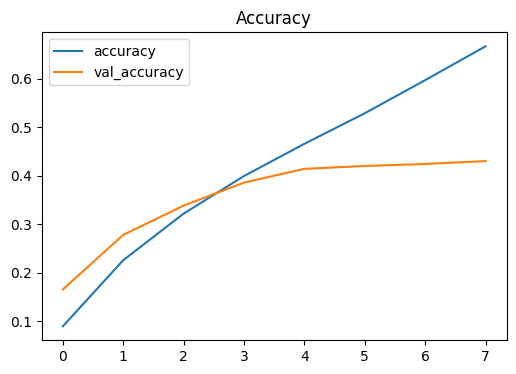

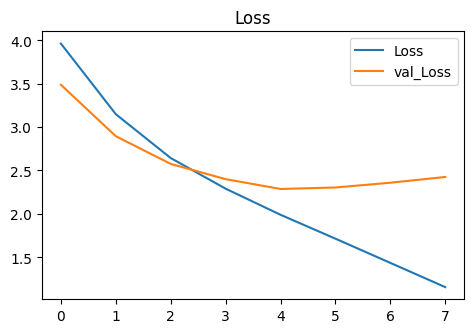

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()